In [1]:
"""
Clustering 2: Worflow to cluster by colour
"""

'\nClustering 2: Worflow to cluster by colour\n\n- \n\nopen task :\n- reorganise the flow, feature reduction after weighting ?\n'

In [2]:
"""
Installing the dependencies
"""

# import necessary library
# kmeans clustering
from sklearn import preprocessing
from sklearn.cluster import KMeans


# yellowbrick visualizers
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.cluster import intercluster_distance
from yellowbrick.contrib.scatter import ScatterVisualizer

# loading and handling data
import pandas as pd
import numpy as np
import os

# for saving and loading k means model
import pickle as pk

# dimensional reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# generic plotting
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
date = 240826
file_path = f"C:\\Users\\david\\OneDrive\\Documents\\01_Architektur\\02_MA Architektur\\TUM\\2024_Sommersemester\\01_THESIS\\02_MA_Thesis\\02_Listing\\01_Visual_Studio\\240816_Simulation\\02-3_Simulate_Tests\\01_Tested"

brick_data = pd.DataFrame()

for filename in os.listdir(file_path):
    if filename.endswith(".csv"):
        full_file_path = os.path.join(file_path, filename)
        try:
            df_import = pd.read_csv(full_file_path, sep=",", encoding="utf-8")

        except UnicodeDecodeError:
            df_import = pd.read_csv(full_file_path, sep=",", encoding="ISO-8859-1")

        brick_data = pd.concat([brick_data, df_import], ignore_index=True)


numeric_brick_data = [
    "brick_distance (km)",
    "age (y)",

    "R",
    "G",
    "B",

    "lu (mm)",
    "wu (mm)",
    "hu (mm)",
    "volume (%)",

    "mortar rests (%)",
    "colour rests (%)",

    "hue (0.1 - 10.0)",
    "pitch (0.1 - 10.0)",

    "dry_weight (g)",
    "density (kg/m3)",

    "UPV (km/s)",
    "fst (N/mm2)",
    "fk (N/mm2)",
    "IRA (kg/(m2*min))",
    "RPV (%)"
    ]


print(brick_data.head(5))
print(len(brick_data))

   Unnamed: 0  brick_id  delivery_nr  brick_format  \
0        1318      1319            1  Reichsformat   
1        1319      1320            1  Reichsformat   
2        1333      1334            1  Reichsformat   
3        1365      1366            1  Reichsformat   
4        1368      1369            1  Reichsformat   

  brick_original_dimensions (mm) brick_origin  brick_distance (km)  age (y)  \
0                   250, 120, 65       Erding                   43       79   
1                   250, 120, 65       Erding                   43       79   
2                   250, 120, 65       Erding                   43       79   
3                   250, 120, 65       Erding                   43       79   
4                   250, 120, 65       Erding                   43       79   

  colour name  turn_nr  ...  samples colour rests (%)  volume (mm3)  \
0       beige        2  ...                      0.03       1862515   
1       beige        2  ...                      0.03     

In [5]:
""" 
TRAIN THE SCALER MODEL
API : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- changes for version afterwards : fit transform fits and transforms in one step, no need to train a model
"""

scaler = preprocessing.StandardScaler().fit(brick_data[numeric_brick_data])
scaler.mean_ # berechnung des Durschnittswertes aller in einer columns augeführten Werte
scaler.scale_ 

# save the trained mode model, commented this out after fitting
pk.dump(scaler, open(f"scaler.pkl","wb"))

In [6]:
representatives_data = brick_data.groupby('test group ident').first().reset_index()
#print(representatives)
representatives_numeric = representatives_data[numeric_brick_data]
#print(representatives_numeric)
print(len(representatives_numeric))
representatives_numeric[:8]

163


,brick_distance (km),age (y),R,G,B,lu (mm),wu (mm),hu (mm),volume (%),mortar rests (%),colour rests (%),hue (0.1 - 10.0),pitch (0.1 - 10.0),dry_weight (g),density (kg/m3),UPV (km/s),fst (N/mm2),fk (N/mm2),IRA (kg/(m2*min)),RPV (%)
0,43,79,229,194,144,244.8,116.1,66.9,0.98,0.24,0.01,4.3,4.4,3597.2,1990.8,1.8,25.00,7.24,3.4,0.798
1,43,79,229,194,144,241.6,117.3,61.8,0.90,0.09,0.01,3.7,3.2,3398.1,1851.2,1.8,18.04,5.99,3.6,0.883
2,43,79,229,194,144,254.9,122.0,63.8,1.02,0.35,0.01,4.0,4.8,3719.1,1917.5,1.8,17.93,5.96,3.5,0.866
3,43,79,182,121,93,239.7,119.2,66.9,0.98,0.29,0.01,9.1,8.6,5383.1,3089.5,3.4,63.00,10.22,1.4,0.659
4,43,79,182,121,93,248.2,116.2,66.4,0.98,0.38,0.12,9.2,8.7,5486.6,3083.6,3.1,55.48,10.22,1.2,0.641
5,43,79,182,121,93,248.4,124.0,63.8,1.01,0.35,0.01,8.4,8.3,5053.7,2884.1,2.9,51.25,10.22,1.6,0.626
6,43,79,223,145,121,243.7,118.8,63.4,0.94,0.33,0.01,8.0,8.5,5785.5,2817.6,2.8,44.45,10.14,1.7,0.732
7,43,79,223,145,121,182.4,124.6,64.3,0.75,0.33,0.01,8.4,8.1,5530.1,2910.0,3.1,43.56,10.02,1.7,0.639


In [7]:
# load the model
scaler = pk.load(open(f"scaler.pkl","rb"))
representatives_scaled = scaler.transform(representatives_numeric)
#X_scaled = scaler.transform(brick_data[numeric_brick_data])
# display the first 5 rows, control function

representatives_scaled[:1]

array([[-1.27294584, -0.84597649,  0.83739292,  1.31897035,  1.2963891 ,
         0.22969299, -1.12598311,  1.00500366,  0.22543418, -0.40210817,
        -0.62050783, -0.41212755, -0.38599937, -0.4816365 , -0.39702314,
        -0.5187897 , -0.40455133, -0.1103478 ,  0.40152448,  0.06249963]])

In [8]:
""" 
using PCA on the scaled data for dimensional reduction
API : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
"""

# Perform PCA analysis with SCALED DATA
pca = PCA()
pca_result = pca.fit_transform(representatives_scaled)
# Calculate variance ratios
explained_variance = pca.explained_variance_ratio_ # Percentage of variance explained by each of the selected components

print(explained_variance)

[4.94420171e-01 1.35728338e-01 1.08313788e-01 6.09636708e-02
 5.29846010e-02 4.38945610e-02 3.99355453e-02 3.39389087e-02
 1.15599830e-02 5.01417933e-03 3.67421881e-03 3.35275239e-03
 2.30375238e-03 1.62681241e-03 1.23212524e-03 5.80129269e-04
 2.84392903e-04 1.16619709e-04 6.04093304e-05 1.50407712e-05]


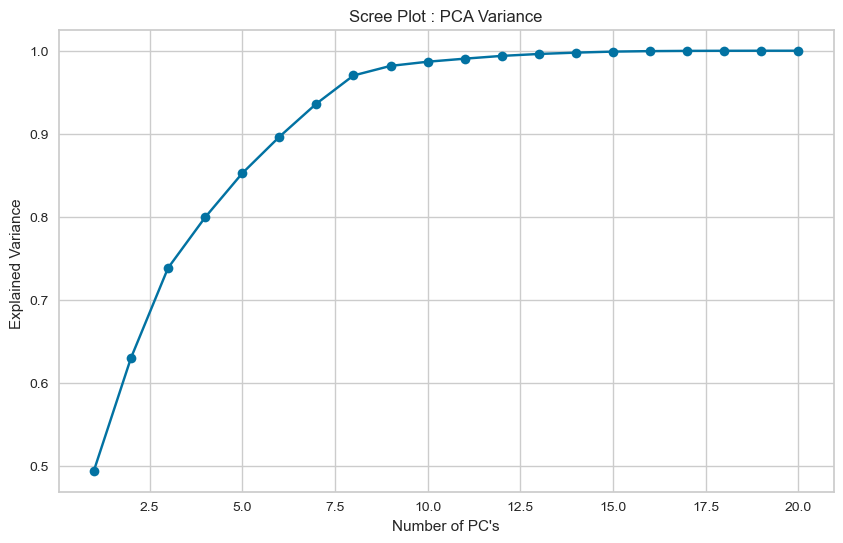

In [9]:
# create a scree plot

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), "bo-")
plt.xlabel("Number of PC's")
plt.ylabel("Explained Variance ")
plt.title("Scree Plot : PCA Variance")
plt.savefig(f"{date}_Scree_Plot.png")

plt.show()

In [10]:
n_components = 2

pca = PCA(n_components = n_components)
pca_result = pca.fit_transform(representatives_scaled)

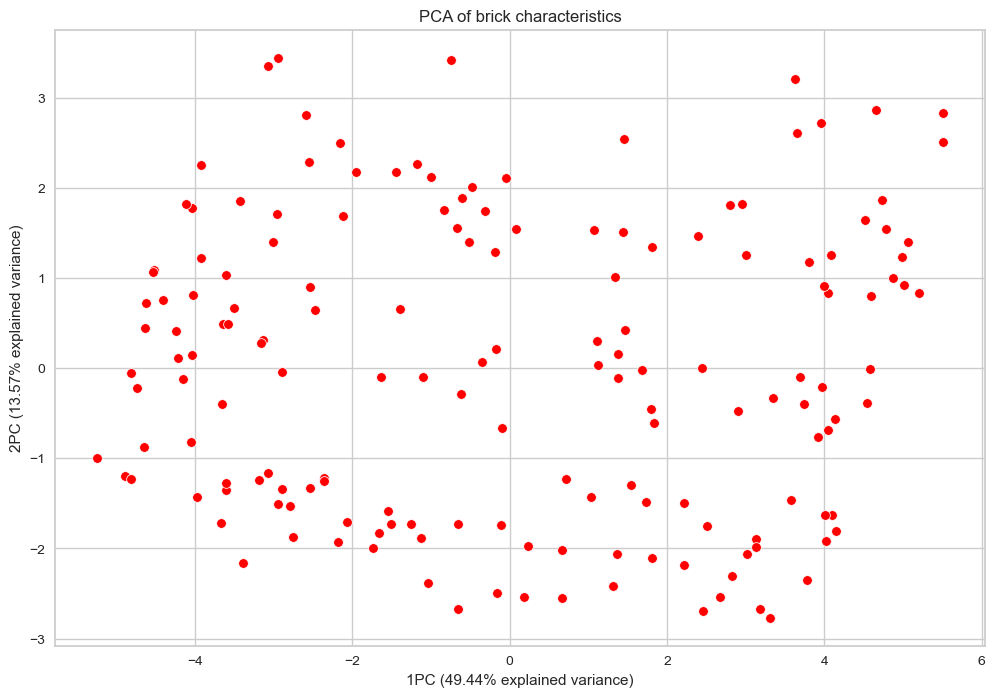

In [11]:
brick_data_pca = representatives_data.copy()
# Add PCA results to the dataframe for number of  components

for i in range(n_components):
    brick_data_pca[f"PC{i+1}"] = pca_result[:, i]

# plot the results
plt.figure(figsize=(12, 8))
sns.scatterplot(data = brick_data_pca, x = "PC1", y = "PC2", color = "red",  sizes=(20, 200), legend=False)
plt.title("PCA of brick characteristics")
plt.xlabel(f"1PC ({pca.explained_variance_ratio_[0]:.2%} explained variance)")
plt.ylabel(f"2PC ({pca.explained_variance_ratio_[1]:.2%} explained variance)")
plt.savefig(f"{date}_PCA_Plot.png")

plt.show()

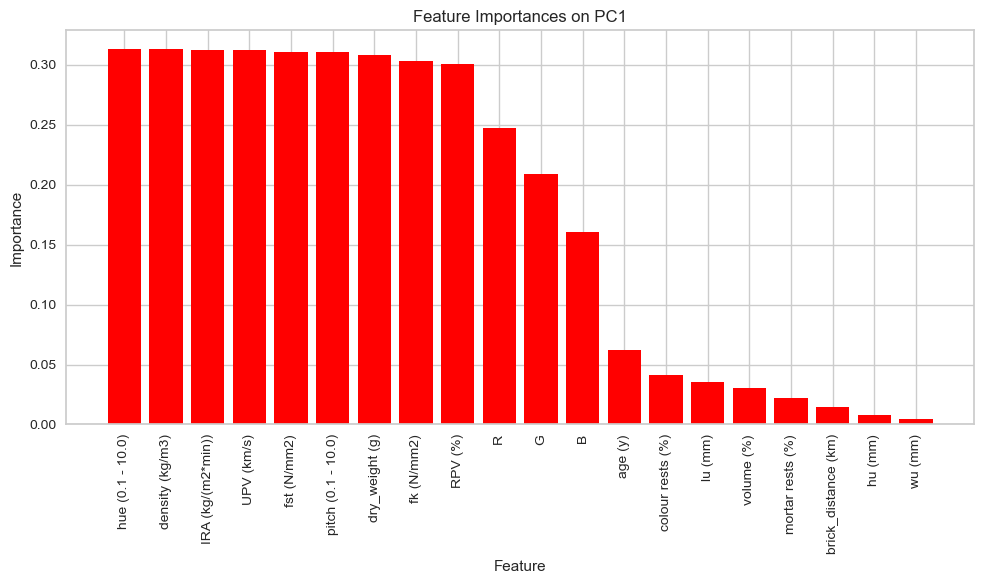

Feature importances on PC1 :
                feature  importance
11     hue (0.1 - 10.0)    0.312991
14      density (kg/m3)    0.312789
18    IRA (kg/(m2*min))    0.312376
15           UPV (km/s)    0.312059
16          fst (N/mm2)    0.310488
12   pitch (0.1 - 10.0)    0.310371
13       dry_weight (g)    0.307952
17           fk (N/mm2)    0.302879
19              RPV (%)    0.301043
2                     R    0.247423
3                     G    0.209131
4                     B    0.160754
1               age (y)    0.062136
10     colour rests (%)    0.041194
5               lu (mm)    0.035320
8            volume (%)    0.030285
9      mortar rests (%)    0.022464
0   brick_distance (km)    0.014448
7               hu (mm)    0.007626
6               wu (mm)    0.004354


In [13]:
# Print feature importances 
feature_importance = pd.DataFrame({
    "feature" : numeric_brick_data,
    "importance" : np.abs(pca.components_[0])  # Using the 1PC
})

feature_importance = feature_importance.sort_values("importance", ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance["feature"], feature_importance["importance"], color="red")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.title("Feature Importances on PC1")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"{date}_Feature-Importances_Plot.png")
plt.show()

print("Feature importances on PC1 :")
print(feature_importance)

In [14]:
# Brick data, omitted the labels and the ones with low feature importance
# warum haben diese so viel bedeutung auf die PCA, wie kommt das rechnerisch zustande ??

scaler_trim = preprocessing.StandardScaler()
# distance and year raus
numeric_brickdata_trimmed = [

    "lu (mm)",
    "wu (mm)",
    "hu (mm)",
    "volume (%)",
    
    "density (kg/m3)",

    "pitch (0.1 - 10.0)",
    "UPV (km/s)",
    "fst (N/mm2)",
    "fk (N/mm2)",

    "mortar rests (%)",
    "IRA (kg/(m2*min))",

    
    
    "RPV (%)", 
    
    "hue (0.1 - 10.0)",
    "R",
    "G",
    "B",
    "colour rests (%)"

    ]

representatives_scaled_trim = scaler.fit_transform(representatives_data[numeric_brickdata_trimmed])
representatives_scaled_trim[1]

array([ 0.18189617, -0.83737399, -1.84022848, -0.33929558, -0.58143298,
       -0.77951294, -0.49799279, -0.71656329, -0.56068442, -1.22357773,
        0.53825949,  0.69909124, -0.59278728,  0.84301765,  1.31186636,
        1.30386866, -0.60748181])

In [16]:
name = "application_colour"

# WEIGHTS

"""Origin Data"""
#distance_weight = 0.0
#age_weigth = 0.0


"""Geometry"""
lu_weight = 0.0
wu_weight = 0.0
hu_weight = 0.0
volume_weigth = 0.0

"""Density"""
density_weight = 0.0

"""Compressive Strength"""
pitch_weight = 0.0
UPV_weight = 0.0
fst_weight = 0.0
fk_weight = 0.0

"""Bond Strength"""
mortar_rests_weight = 0.0
IRA_weigth = 0.0

"""Resistance to External Infl"""
RPV_weight = 2.5

"""Appearance / Hue"""
hue_weight = 2.0
R_weight = 2.0
G_weight = 2.0
B_weight = 2.0
colour_rests_weight = 0.0

"""else"""
#dry_weight_weight = 0.2

weights = [
      
      float(lu_weight),
      float(wu_weight),
      float(hu_weight),
      float(volume_weigth),

      float(density_weight),

      float(pitch_weight), 
      float(UPV_weight),
      float(fst_weight),
      float(fk_weight),

      float(mortar_rests_weight),
      float(IRA_weigth),
      
      float(RPV_weight),

      float(hue_weight),
      float(R_weight),
      float(G_weight),
      float(B_weight),
      float(colour_rests_weight)
      
      ]

if len(weights) == representatives_scaled_trim.shape[1]:
        
        representatives_weighted = representatives_scaled_trim * np.array(weights)
        print(representatives_weighted[1])
        print(representatives_scaled_trim[1])
else:
    raise ValueError("number of weights not matching :(")

[ 0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          1.74772811
 -1.18557457  1.6860353   2.62373272  2.60773732 -0.        ]
[ 0.18189617 -0.83737399 -1.84022848 -0.33929558 -0.58143298 -0.77951294
 -0.49799279 -0.71656329 -0.56068442 -1.22357773  0.53825949  0.69909124
 -0.59278728  0.84301765  1.31186636  1.30386866 -0.60748181]


In [17]:
# Perform PCA analysis

n_components = 2

pca = PCA(n_components = n_components)
pca_result = pca.fit_transform(representatives_weighted)

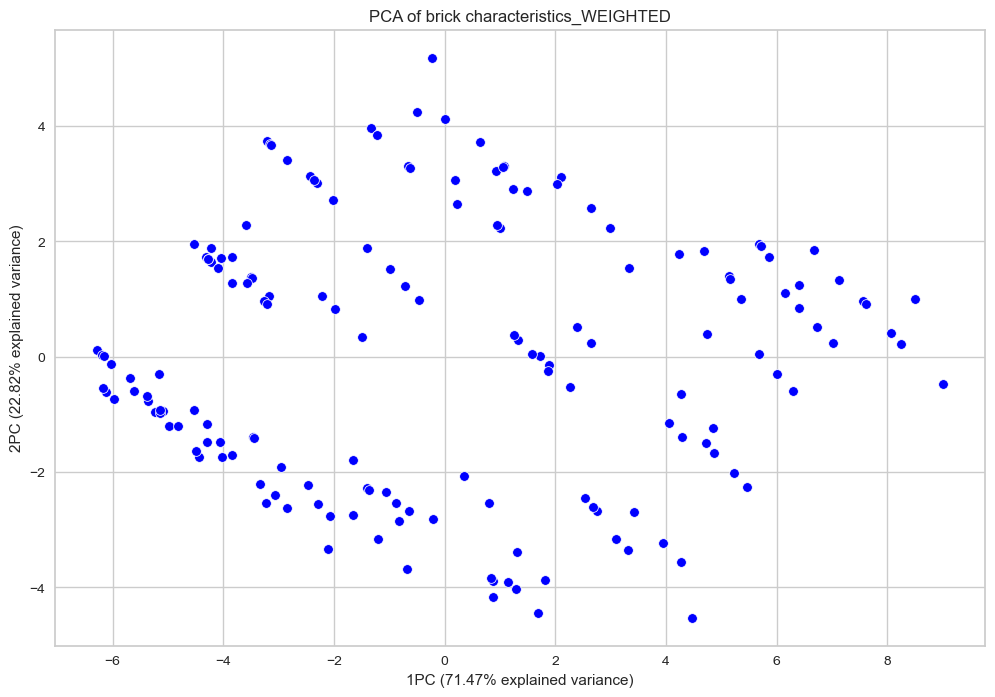

In [18]:
# Add PCA results to the dataframe for number of  components
brick_data_pca_weighted = representatives_data.copy()
for i in range(n_components):
    brick_data_pca_weighted[f"PC{i+1}"] = pca_result[:, i]

# plot the results, missing : size="batch_group",
plt.figure(figsize=(12, 8))
sns.scatterplot(data = brick_data_pca_weighted, x = "PC1", y = "PC2", color = "blue", sizes=(20, 200), legend=False)
plt.title("PCA of brick characteristics_WEIGHTED")
plt.xlabel(f"1PC ({pca.explained_variance_ratio_[0]:.2%} explained variance)")
plt.ylabel(f"2PC ({pca.explained_variance_ratio_[1]:.2%} explained variance)")
plt.savefig(f"{date}_{name}_PCA_Plot_weighted.png")

plt.show()

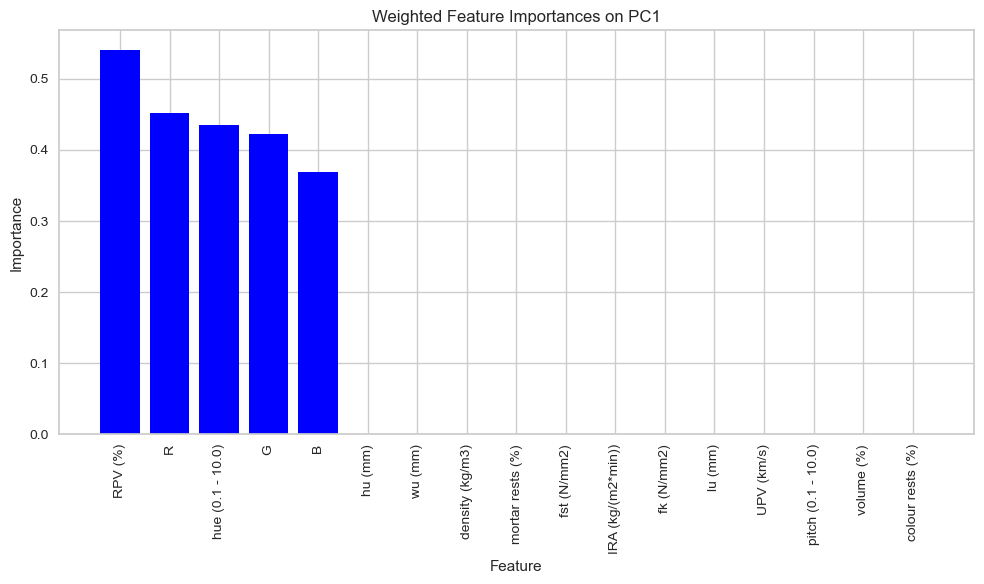

Feature importances on PC1 Weighted :
               feature    importance
11             RPV (%)  5.408864e-01
13                   R  4.513162e-01
12    hue (0.1 - 10.0)  4.356486e-01
14                   G  4.222690e-01
15                   B  3.683134e-01
2              hu (mm)  1.110223e-16
1              wu (mm)  1.110223e-16
4      density (kg/m3)  1.084202e-19
9     mortar rests (%)  5.473822e-48
7          fst (N/mm2)  4.960651e-48
10   IRA (kg/(m2*min))  1.731952e-48
8           fk (N/mm2)  1.282927e-49
0              lu (mm)  0.000000e+00
6           UPV (km/s)  0.000000e+00
5   pitch (0.1 - 10.0)  0.000000e+00
3           volume (%)  0.000000e+00
16    colour rests (%)  0.000000e+00


In [19]:
# Print feature importances 
feature_importance = pd.DataFrame({
    "feature" : numeric_brickdata_trimmed,
    "importance" : np.abs(pca.components_[0])  # Using the 1PC
})

feature_importance = feature_importance.sort_values("importance", ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance["feature"], feature_importance["importance"], color="blue")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.title("Weighted Feature Importances on PC1")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"{date}_{name}_Feature-Importances_Plot_weighted.png")
plt.show()

print("Feature importances on PC1 Weighted :")
print(feature_importance)

c:\Users\david\anaconda3\envs\sklearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\david\anaconda3\envs\sklearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\david\anaconda3\envs\sklearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\david\anaconda3\envs\sklearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

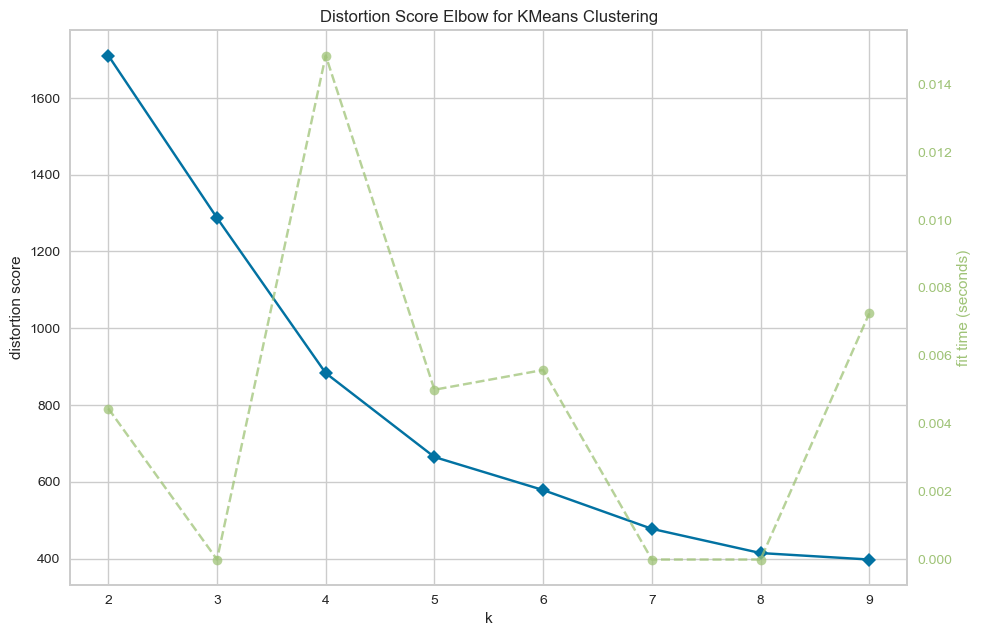

In [21]:
# first plot, defining the optimal amount of clusters for the data
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k = (2, 10), size=(1080, 720), locate_elbow = False)
visualizer.fit(representatives_weighted)        # Fit the SCALED data to the visualizer
visualizer.show(outpath=f"{date}_{name}_Elbowplot_distortion-score.png")       # Finalize and render the figure, commented out

In [37]:
"""
TRAIN THE KMEANS MODEL

after reading the graph, deciding for 5 clusters as optimal number
"""

# explore  number of cluster and fit the model
k = 5
# train and save mode model, 
kmeanModel = KMeans(n_clusters=k, random_state=None, n_init="auto")
kmeanModel.fit(representatives_weighted)
# I commented this out after fitting
pk.dump(kmeanModel, open(f"{name}_kmeanModel_k{k}.pkl","wb"))

c:\Users\david\anaconda3\envs\sklearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
# load the model
kmeanModel = pk.load(open(f"{name}_kmeanModel_k{k}.pkl","rb"))
#print(X_scaled[:5])
cluster_center = kmeanModel.cluster_centers_
cluster_labels = kmeanModel.labels_
cluster_iterations = kmeanModel.n_iter_

print(cluster_center)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -2.88491436
   2.31374824 -3.69970084 -2.96577577 -2.65918159  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          2.35736474
  -2.0310712   1.66500516  1.99298753  1.97176901  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -1.40866639
   1.23257904  1.21215371  1.52385677  1.58584738  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -2.57158496
   1.99111564 -1.13497568 -0.93253286 -0.45768507  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.7321327
  -1.21682673  0.20752472 -1.1107535  -1.70036593

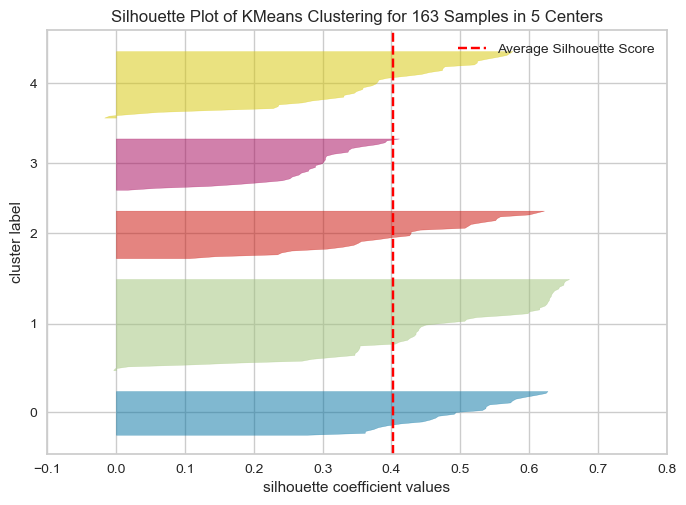

<Figure size 800x550 with 0 Axes>

In [39]:
#shilloute score
visualizer1 = silhouette_visualizer(kmeanModel, representatives_weighted, colors='yellowbrick', is_fitted=True)      # Fit the data to the visualizer
visualizer1.show(outpath = None) 
plt.savefig(f"{date}_{name}_Silhouette_plot_k{k}.png")
plt.show()

In [40]:
# integrate the clusters to table 
representatives_data["cluster"] = kmeanModel.predict(representatives_weighted)
to_cluster = representatives_data.set_index("test group ident")["cluster"].to_dict()
brick_data["brick_clusters"] = brick_data["test group ident"].map(to_cluster)

print(brick_data[:5])
# save the new cluster column to my csv file
csv_filename = f"{date}_{name}_Brick_cluster_k{k}.csv"
json_filename = f"{date}_{name}_Brick_cluster_k{k}.json"
brick_data.to_csv(csv_filename, index=False)
brick_data.to_json(json_filename, orient='records', indent=2)

# display the first 5 of the list
brick_data.head(5)

   Unnamed: 0  brick_id  delivery_nr  brick_format  \
0        1318      1319            1  Reichsformat   
1        1319      1320            1  Reichsformat   
2        1333      1334            1  Reichsformat   
3        1365      1366            1  Reichsformat   
4        1368      1369            1  Reichsformat   

  brick_original_dimensions (mm) brick_origin  brick_distance (km)  age (y)  \
0                   250, 120, 65       Erding                   43       79   
1                   250, 120, 65       Erding                   43       79   
2                   250, 120, 65       Erding                   43       79   
3                   250, 120, 65       Erding                   43       79   
4                   250, 120, 65       Erding                   43       79   

  colour name  turn_nr  ...  volume (mm3)  dry_weight (g)  density (kg/m3)  \
0       beige        2  ...       1862515          3597.2           1990.8   
1       beige        2  ...       1862515   

,Unnamed: 0,brick_id,delivery_nr,brick_format,brick_original_dimensions (mm),brick_origin,brick_distance (km),age (y),colour name,turn_nr,...,volume (mm3),dry_weight (g),density (kg/m3),UPV (km/s),fst (N/mm2),fk (N/mm2),WAC (%),IRA (kg/(m2*min)),RPV (%),brick_clusters
0,1318,1319,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,...,1862515,3597.2,1990.8,1.8,25.0,7.24,19.7,3.4,0.798,1
1,1319,1320,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,...,1862515,3597.2,1990.8,1.8,25.0,7.24,19.7,3.4,0.798,1
2,1333,1334,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,...,1862515,3597.2,1990.8,1.8,25.0,7.24,19.7,3.4,0.798,1
3,1365,1366,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,...,1862515,3597.2,1990.8,1.8,25.0,7.24,19.7,3.4,0.798,1
4,1368,1369,1,Reichsformat,"250, 120, 65",Erding,43,79,beige,2,...,1862515,3597.2,1990.8,1.8,25.0,7.24,19.7,3.4,0.798,1


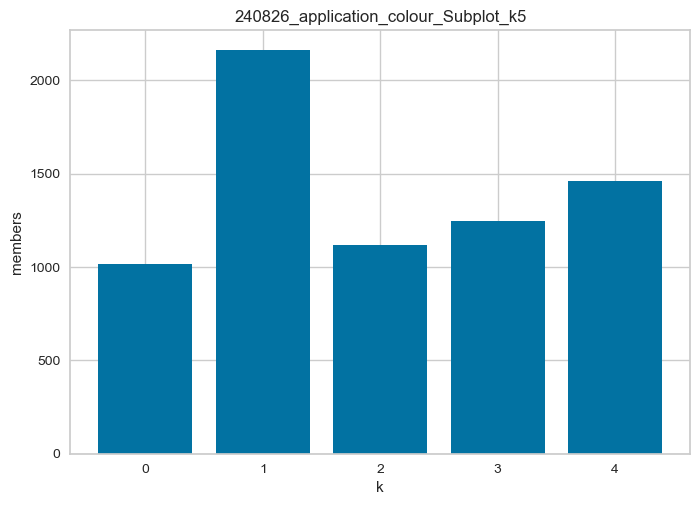

In [41]:
# histogram of the datapoints according to the clusters
clusters = brick_data["brick_clusters"]

cluster_label = [i for i in range(k)]
cluster_frequency = []

for cluster in cluster_label :
    frequenc = np.count_nonzero(clusters == cluster)
    cluster_frequency.append(frequenc)

# plot this with matplotlib

fig, ax = plt.subplots(1, 1)
ax.bar(cluster_label, cluster_frequency)
ax.set_xticks(cluster_label)

plt.title(f"{date}_{name}_Subplot_k{k}")
plt.xlabel(f"k")
plt.ylabel(f"members")

plt.savefig(f"{date}_{name}_Subplot_k{k}.png")

plt.show()


In [45]:
# perform PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(representatives_weighted)

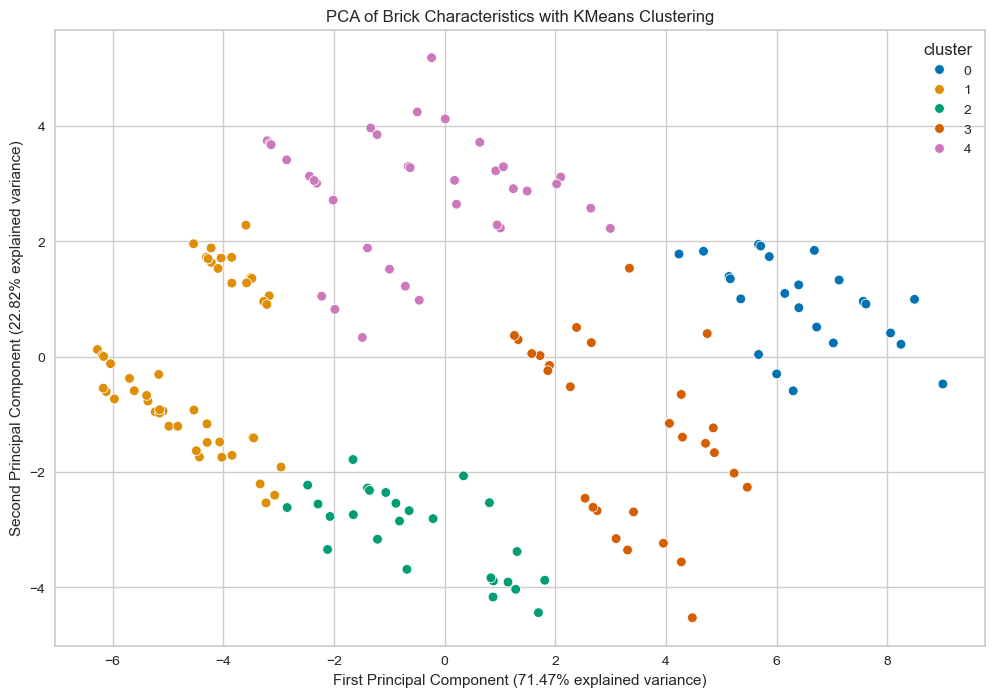

In [46]:
brick_data_pca_final = representatives_data.copy()

brick_data_pca_final["PC1"] = pca_result[:, 0]
brick_data_pca_final["PC2"] = pca_result[:, 1]
plt.figure(figsize=(12, 8))
sns.scatterplot(data=brick_data_pca_final, x="PC1", y="PC2", hue = "cluster", sizes=(20, 200), palette="colorblind", markers = True)
plt.title("PCA of Brick Characteristics with KMeans Clustering")
plt.xlabel(f"First Principal Component ({pca.explained_variance_ratio_[0]:.2%} explained variance)")
plt.ylabel(f"Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} explained variance)")
plt.savefig(f"{date}_{name}_PCA_Plot_k-groups.png")
plt.show()

#occurrences = brick_data_pca['brick_clusters'].value_counts()
#print(occurrences)